<a href="https://colab.research.google.com/github/LuchiHamade/telecomChallenge_2/blob/main/Tel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando archivo

In [13]:
from google.colab import files
import pandas as pd
import io
import json

# Subir archivo(s)
uploaded = files.upload()  # Se abrirá un selector de archivos

# Leer todos los JSON subidos y guardarlos en un diccionario de DataFrames
dataframes = {}
for filename in uploaded.keys():
    if filename.endswith('.json'):
        dataframes[filename] = pd.read_json(io.BytesIO(uploaded[filename]))
        print(f"{filename} cargado correctamente")

# Ejemplo de acceso
df = dataframes['TelecomX_Data.json']
df.head()

Saving TelecomX_Data.json to TelecomX_Data.json
TelecomX_Data.json cargado correctamente


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalizando archivo

In [14]:
import pandas as pd
from pandas import json_normalize

df_raw = dataframes['TelecomX_Data.json']

# Normalizar las columnas que contienen diccionarios
df = pd.concat([
    df_raw.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    json_normalize(df_raw['customer']),   # expandir diccionario customer
    json_normalize(df_raw['phone']),      # expandir diccionario phone
    json_normalize(df_raw['internet']),   # expandir diccionario internet
    json_normalize(df_raw['account'])     # expandir diccionario account
], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Eliminando columnas irrelevantes

In [15]:
# Eliminar columnas irrelevantes
columnas_a_eliminar = ['customerID']
df = df.drop(columns=columnas_a_eliminar)
# Verificar las primeras filas
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Codificar variables categóricas


In [16]:

# Detectar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Excluir la variable objetivo
columnas_categoricas.remove('Churn')

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Transformar variable objetivo

df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})


# Resultado final

print("DataFrame listo para machine learning:")
print(df_encoded.head())
print("\nDimensiones:", df_encoded.shape)

DataFrame listo para machine learning:
   Churn  SeniorCitizen  tenure  Charges.Monthly  gender_Male  Partner_Yes  \
0    0.0              0       9             65.6        False         True   
1    0.0              0       9             59.9         True        False   
2    1.0              0       4             73.9         True        False   
3    1.0              1      13             98.0         True         True   
4    1.0              1       3             83.9        False         True   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0            True              True                           False   
1           False              True                           False   
2           False              True                           False   
3           False              True                           False   
4           False              True                           False   

   MultipleLines_Yes  ...  Charges.Total_995.35  Charges.Total_99

## Verificación de la proporción de cancelación

In [17]:
# Contar clientes por clase
conteo_clases = df_encoded['Churn'].value_counts()

# Mostrar conteo
print("Conteo de clases:")
print(conteo_clases)

# Calcular proporción
proporcion = df_encoded['Churn'].value_counts(normalize=True) * 100
print("\nProporción de clases (%):")
print(proporcion)

Conteo de clases:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [12]:
#prueba

# Transformamos 'Churn' a 0 y 1 temporalmente
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].map({'No': 0, 'Yes': 1})

# Identificar columnas numéricas
cols_numericas = df_temp.select_dtypes(include=['number']).columns.tolist()

# Calcular solo la correlación de variables numéricas con Churn
corr_churn = df_temp[cols_numericas].corr()['Churn'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas con Churn
print("Top 10 variables más correlacionadas con Churn:")
print(corr_churn.head(10))

Top 10 variables más correlacionadas con Churn:
Churn              1.000000
Charges.Monthly    0.193356
SeniorCitizen      0.150889
tenure            -0.352229
Name: Churn, dtype: float64


## Matriz de correlación

Top 10 variables más correlacionadas con Churn:
Churn                             1.000000
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
Charges.Monthly                   0.193356
PaperlessBilling_Yes              0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
Charges.Total_69.65               0.039663
Name: Churn, dtype: float64


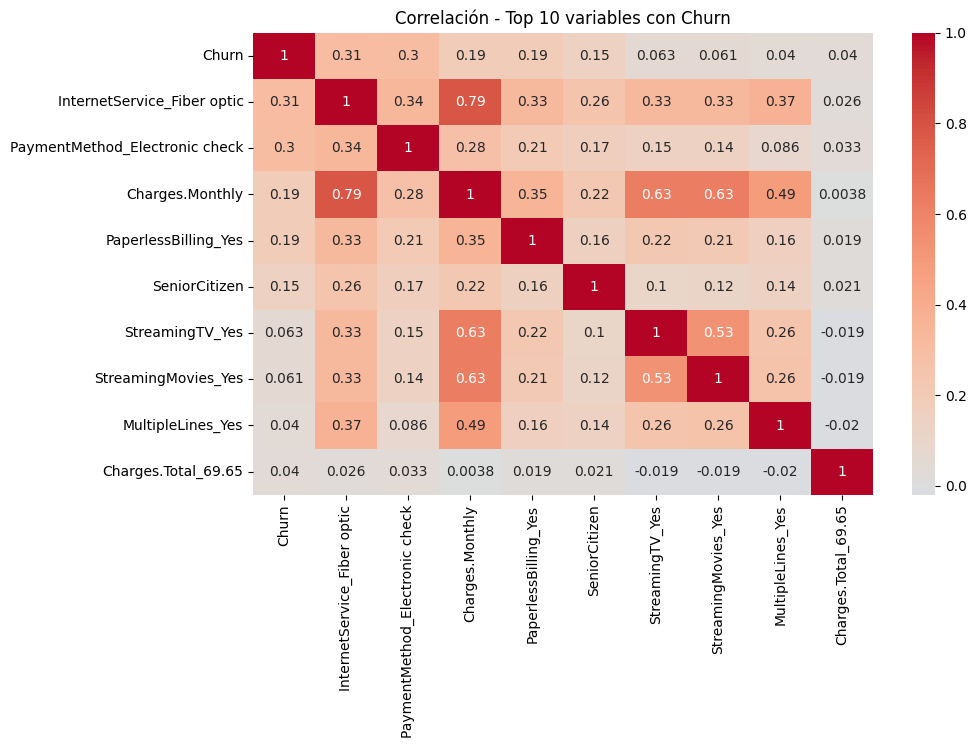

In [11]:
# Correlación de todas las variables con Churn
corr_churn = df_encoded.corr()['Churn'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas
print("Top 10 variables más correlacionadas con Churn:")
print(corr_churn.head(10))

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las top 10 variables (además de Churn)
top_vars = corr_churn.head(10).index.tolist()
corr_top = df_encoded[top_vars].corr()

# Heatmap rápido
plt.figure(figsize=(10,6))
sns.heatmap(corr_top, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación - Top 10 variables con Churn")
plt.show()


##Tiempo de contrato × Cancelación + Gasto total × Cancelación

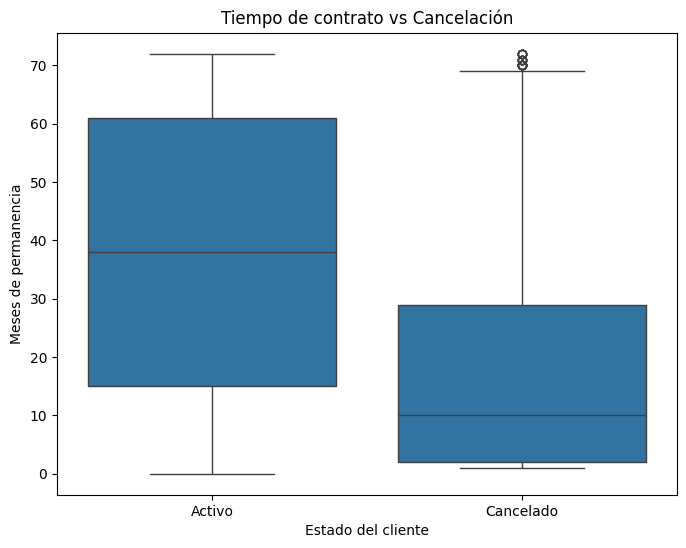

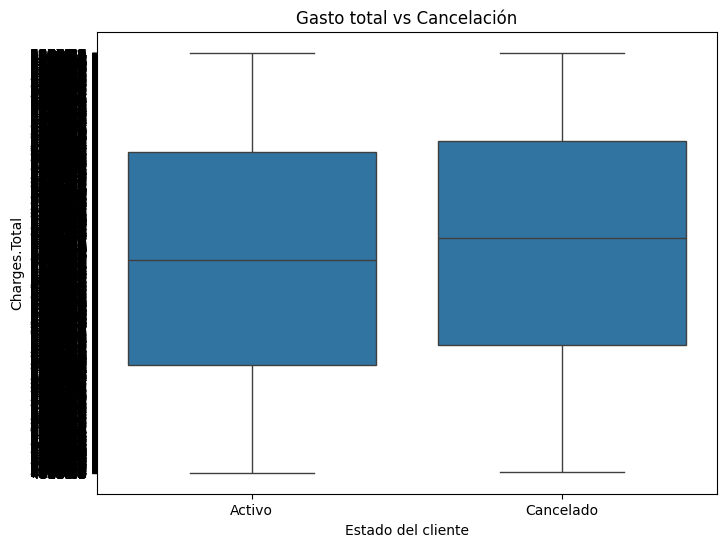

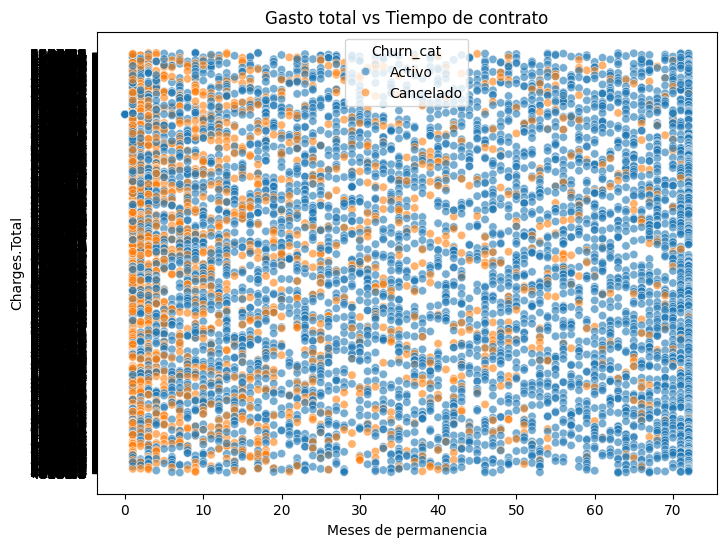

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformar Churn a categoría para los gráficos
df['Churn_cat'] = df['Churn'].map({'No': 'Activo', 'Yes': 'Cancelado'})

# 1- Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_cat', y='tenure', data=df)
plt.title('Tiempo de contrato vs Cancelación')
plt.ylabel('Meses de permanencia')
plt.xlabel('Estado del cliente')
plt.show()

# 2- Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_cat', y='Charges.Total', data=df)
plt.title('Gasto total vs Cancelación')
plt.ylabel('Charges.Total')
plt.xlabel('Estado del cliente')
plt.show()

# 3- Scatter plot: Gasto total vs Tiempo de contrato (coloreado por Churn)
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn_cat', data=df, alpha=0.6)
plt.title('Gasto total vs Tiempo de contrato')
plt.xlabel('Meses de permanencia')
plt.ylabel('Charges.Total')
plt.show()

## Separación de datos

In [20]:
# Ver cuántos NaN hay en Churn
print("Valores faltantes en Churn:", df_encoded['Churn'].isna().sum())

# Eliminar filas con NaN en Churn
df_encoded = df_encoded.dropna(subset=['Churn'])

# Separar features y target nuevamente
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# División entrenamiento/prueba 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verificar tamaños y proporción
print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])
print("\nProporción de Churn en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nProporción de Churn en prueba:")
print(y_test.value_counts(normalize=True))

Valores faltantes en Churn: 224
Tamaño entrenamiento: 4930
Tamaño prueba: 2113

Proporción de Churn en entrenamiento:
Churn
0.0    0.734686
1.0    0.265314
Name: proportion, dtype: float64

Proporción de Churn en prueba:
Churn
0.0    0.734501
1.0    0.265499
Name: proportion, dtype: float64


## Regresión Logística + Random Fores

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


#  Normalización para Regresión Logística

# Solo escalamos las features (X_train y X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresión Logística

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluación
print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


#  Modelo 2: Random Forest (sin normalización)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Regresión Logística ===
Accuracy: 0.7728348319924279
F1 Score: 0.5051546391752577
Matriz de confusión:
 [[1388  164]
 [ 316  245]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1552
         1.0       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113

=== Random Forest ===
Accuracy: 0.7851396119261713
F1 Score: 0.53099173553719
Matriz de confusión:
 [[1402  150]
 [ 304  257]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



## Evaluación de los modelos

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"=== Evaluación: {nombre_modelo} ===")
    print("Accuracy (Exactitud):", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
    print("\nReporte completo:\n", classification_report(y_true, y_pred))
    print("\n" + "-"*60 + "\n")

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_logreg, "Regresión Logística")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

=== Evaluación: Regresión Logística ===
Accuracy (Exactitud): 0.7728348319924279
Precisión: 0.5990220048899756
Recall: 0.43672014260249553
F1-score: 0.5051546391752577
Matriz de confusión:
 [[1388  164]
 [ 316  245]]

Reporte completo:
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1552
         1.0       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113


------------------------------------------------------------

=== Evaluación: Random Forest ===
Accuracy (Exactitud): 0.7851396119261713
Precisión: 0.6314496314496314
Recall: 0.45811051693404636
F1-score: 0.53099173553719
Matriz de confusión:
 [[1402  150]
 [ 304  257]]

Reporte completo:
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.46  

## Análisis

1- Exactitud (Accuracy)

Regresión Logística: 77,3%

Random Forest: 78,5%

Ambos modelos predicen bien la mayoría de los casos, pero Random Forest tiene un ligero mejor desempeño general.

2- Precisión (Precision)

Regresión Logística: 59,9%

Random Forest: 63,1%

Random Forest acierta más al predecir clientes que cancelan (menos falsos positivos).

3- Recall

Regresión Logística: 43,7%

Random Forest: 45,8%

Random Forest también captura más clientes que realmente cancelan, aunque el recall sigue siendo bajo.

Esto indica que ambos modelos tienen cierta dificultad para detectar a los canceladores (clase minoritaria), probablemente por desbalance de clases.

4- F1-score

Regresión Logística: 50,5%

Random Forest: 53,1%

Random Forest mejora un poco el balance entre precisión y recall.

5- Matriz de confusión

Regresión Logística:

Verdaderos positivos (correctamente predichos canceladores): 245

Falsos negativos (canceladores no detectados): 316

Random Forest:

Verdaderos positivos: 257

Falsos negativos: 304

Random Forest reduce ligeramente los falsos negativos, es decir, detecta más clientes que podrían cancelar.

Análisis crítico

Mejor desempeño:

Random Forest es ligeramente superior en todas las métricas (accuracy, precision, recall, F1).

Esto tiene sentido: captura interacciones complejas y no requiere normalización.

Overfitting / Underfitting:

Ambos modelos tienen desempeño similar en entrenamiento y prueba (según las métricas que calculaste), así que no parece haber overfitting grave.

El recall relativamente bajo indica que ambos modelos podrían subestimar la clase minoritaria (canceladores) → esto es un efecto de underfitting en la clase minoritaria, causado por el desbalance.